In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Clustering

In [6]:
Tel_data = pd.read_csv('Telecom_Churn.csv')

##### Null Value Treatment

In [12]:
Tel_data.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis = 1,inplace = True)

In [20]:
Tel_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [24]:
Tel_data.duplicated().sum()

0

##### Outlier Treatment

In [47]:
num=[]
cat=[]
for i in Tel_data.columns:
    if Tel_data[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [51]:
cat

['State', 'International plan', 'Voice mail plan']

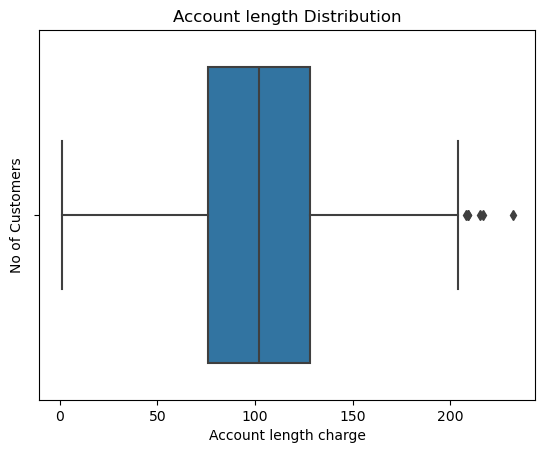

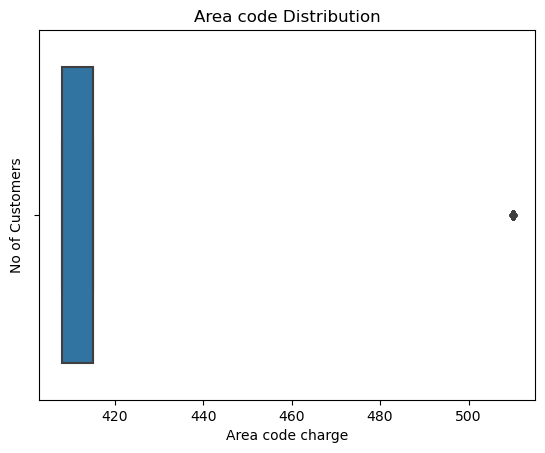

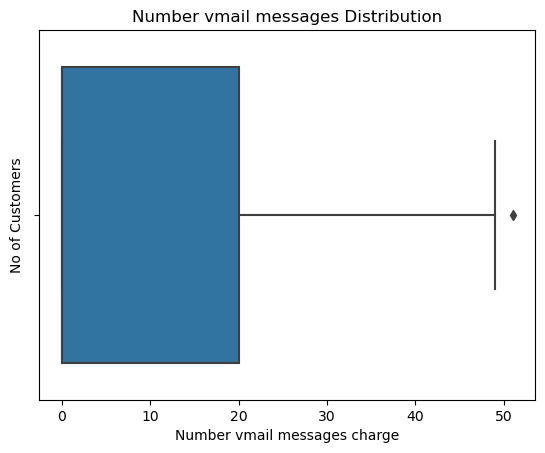

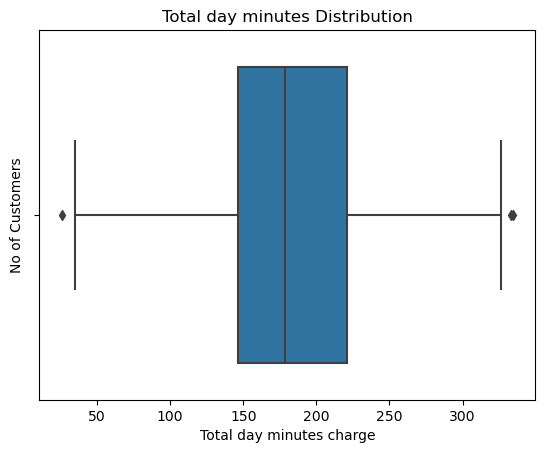

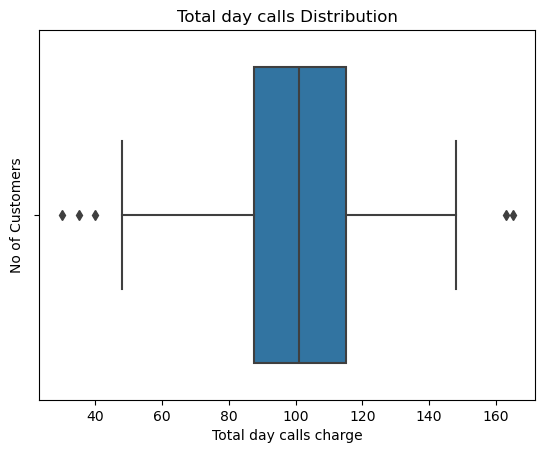

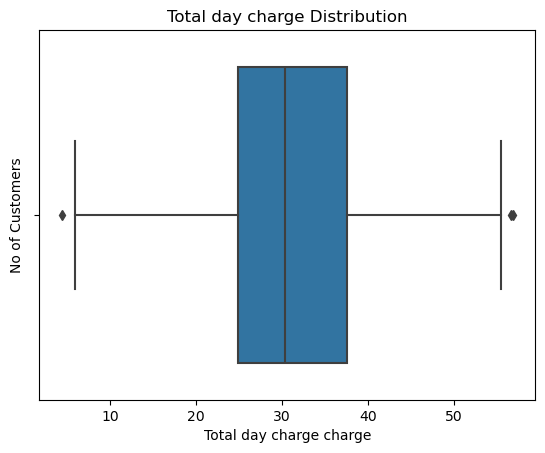

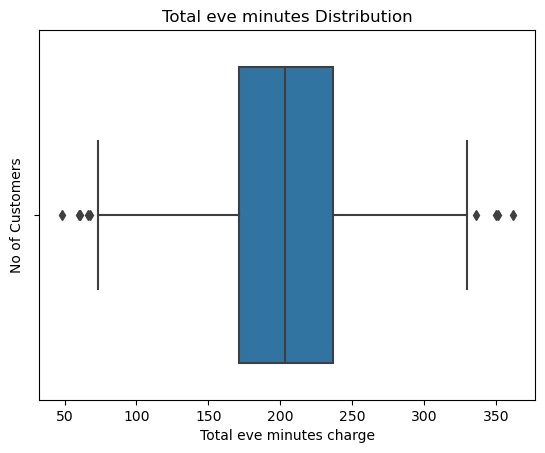

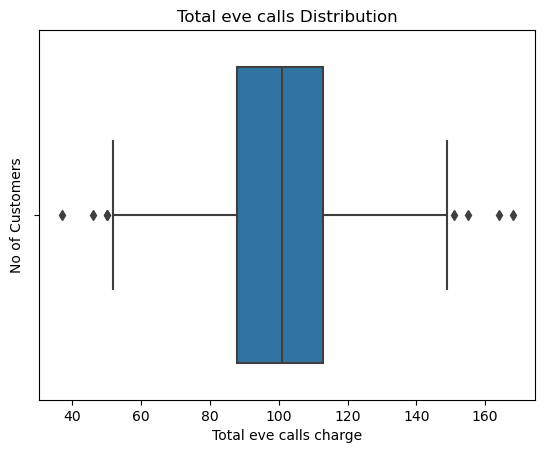

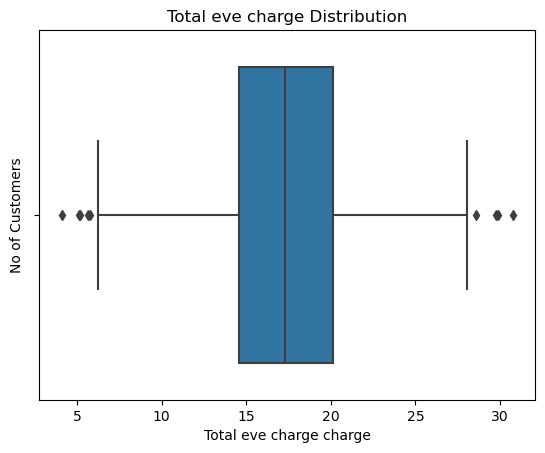

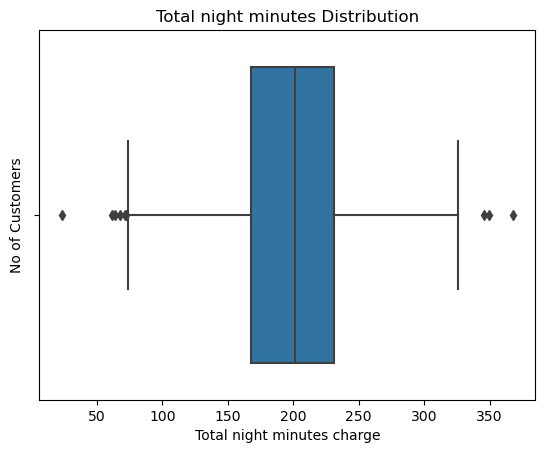

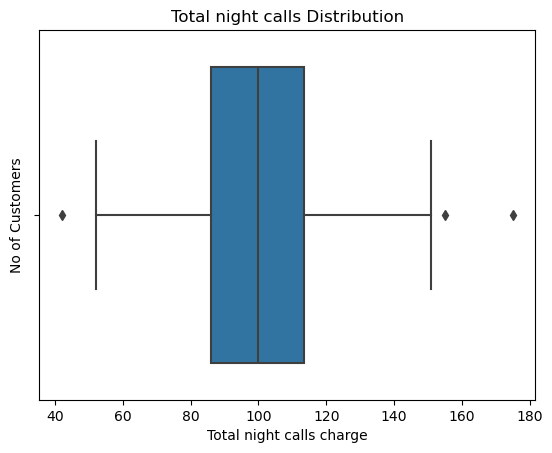

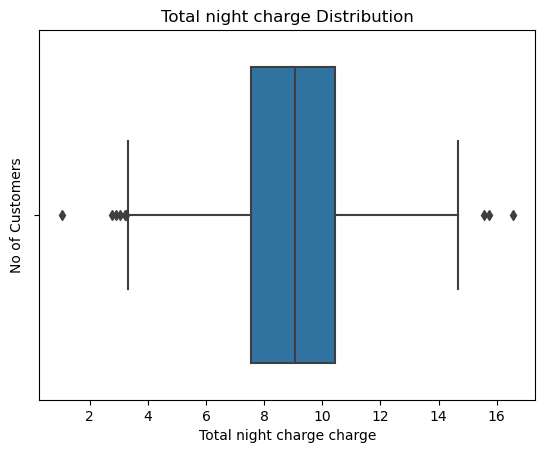

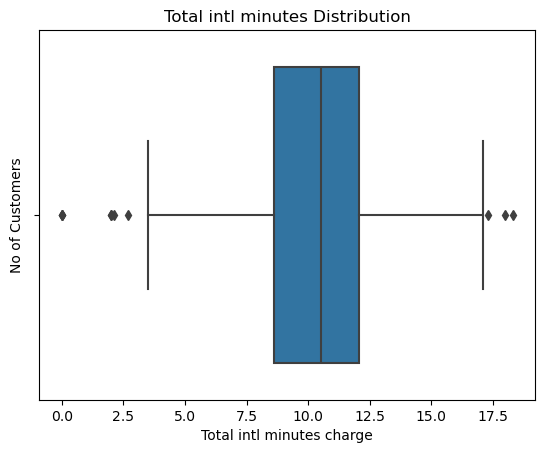

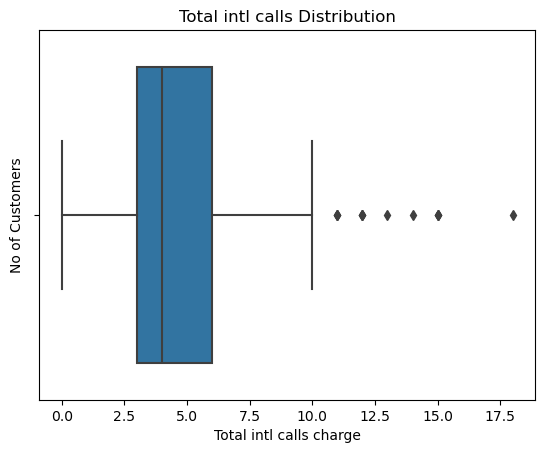

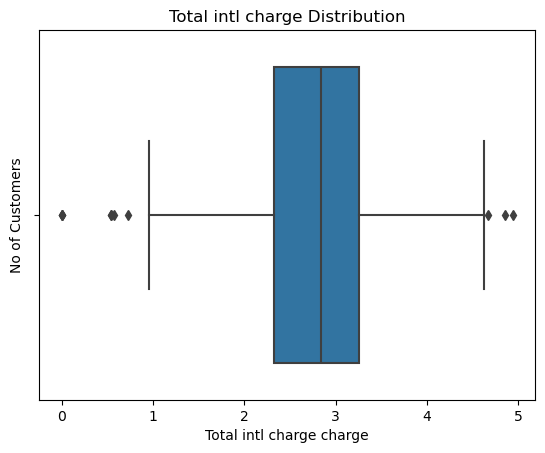

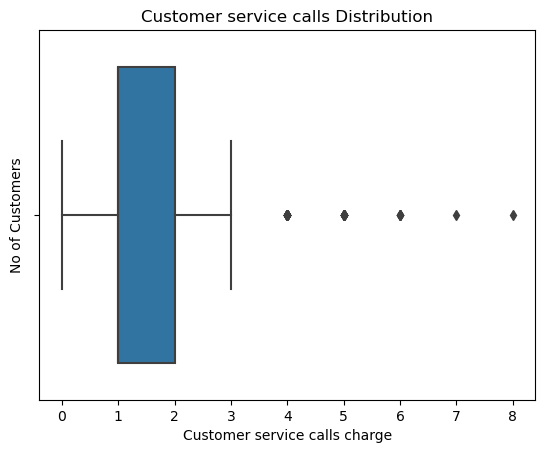

In [55]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [59]:
Q1 = Tel_data[col].quantile(0.25)
Q3 = Tel_data[col].quantile(0.75)
IQR = Q3 - Q1
lr = Q1 - 1.5* IQR
ur = Q3 + 1.5* IQR

In [75]:
for col in num:
    Q1 = Tel_data[num][col].quantile(0.25)
    Q3 = Tel_data[num][col].quantile(0.75)
    IQR = Q3 - Q1
    lr = Q1 - 1.5* IQR
    ur = Q3 + 1.5* IQR
    Tel_data[num][col] = np.where(Tel_data[num][col]>ur,ur,Tel_data[num][col])
    Tel_data[num][col] = np.where(Tel_data[num][col]<lr,lr,Tel_data[num][col])

C:\Users\Admin\AppData\Local\Temp\ipykernel_25572\1508719960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tel_data[num][col] = np.where(Tel_data[num][col]>ur,ur,Tel_data[num][col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25572\1508719960.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tel_data[num][col] = np.where(Tel_data[num][col]<lr,lr,Tel_data[num][col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25572\1508719960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [79]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [81]:
for col in Tel_num:
    lr,ur = remove_outlier(Tel_num[col])
    Tel_num[col] = np.where(Tel_num[col]>ur,ur,Tel_num[col])
    Tel_num[col] = np.where(Tel_num[col]<lr,lr,Tel_num[col])

C:\Users\Admin\AppData\Local\Temp\ipykernel_25572\2507208450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tel_num[col] = np.where(Tel_num[col]>ur,ur,Tel_num[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_25572\2507208450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tel_num[col] = np.where(Tel_num[col]<lr,lr,Tel_num[col])


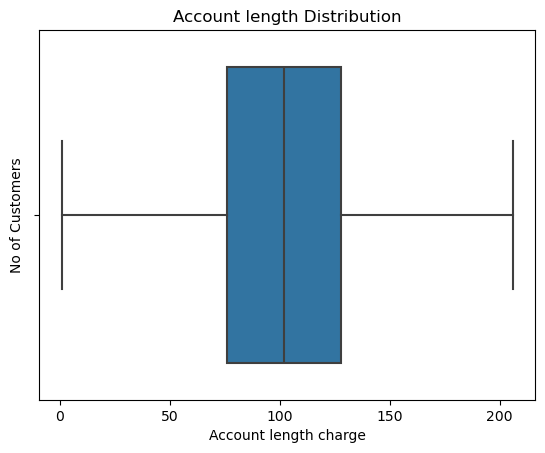

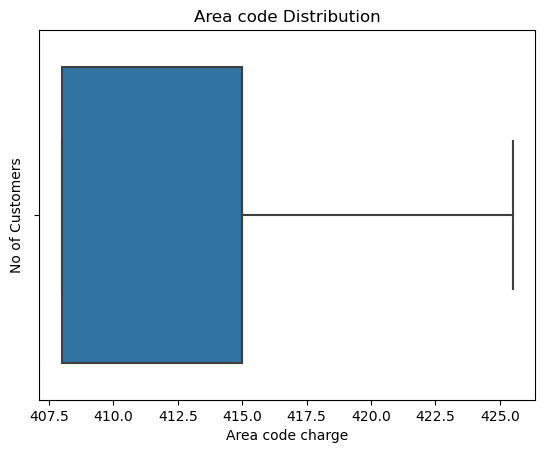

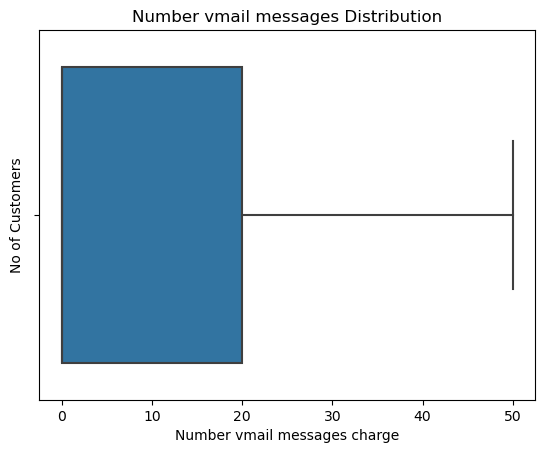

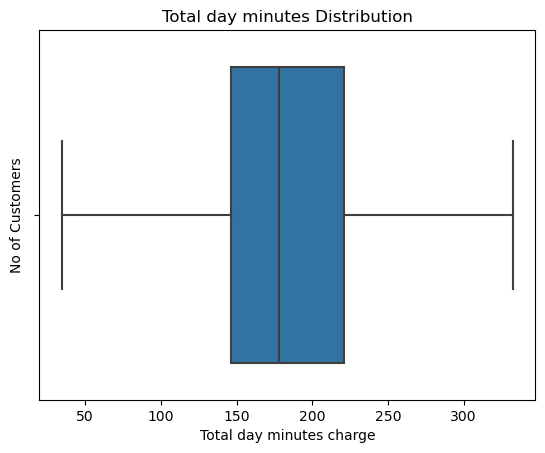

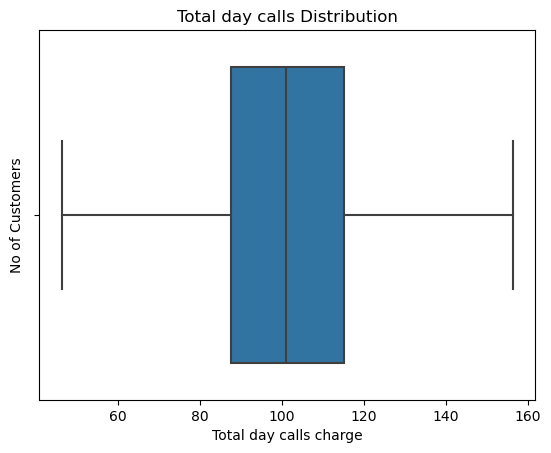

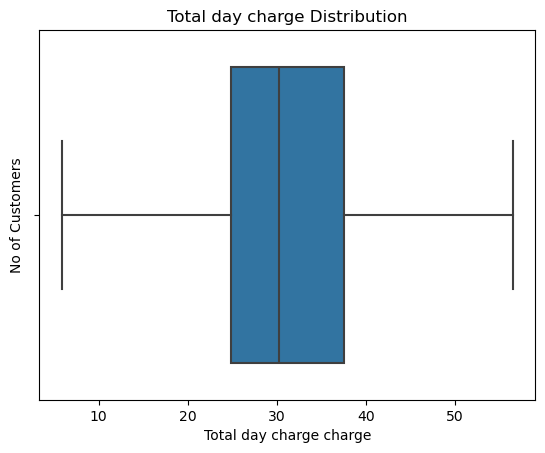

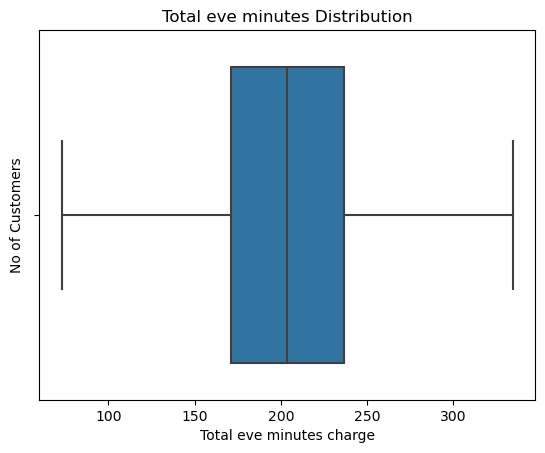

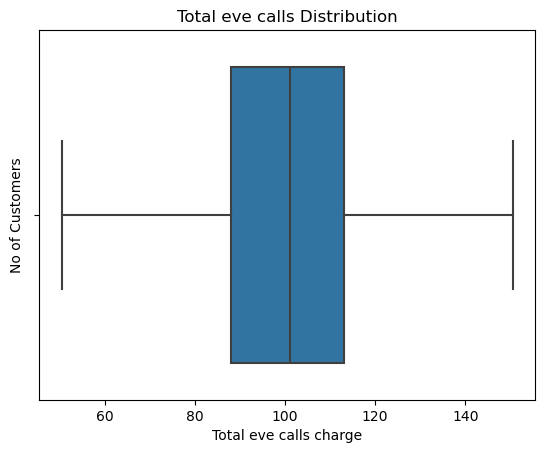

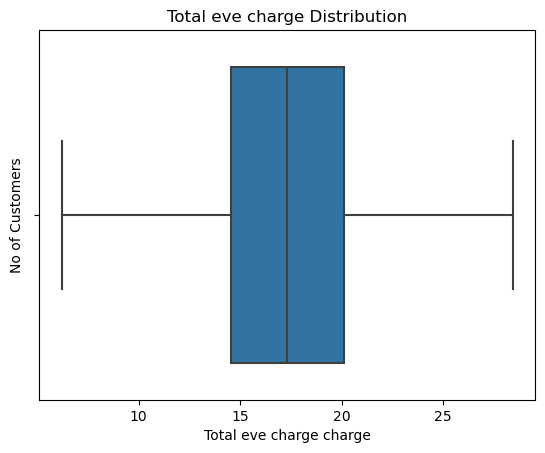

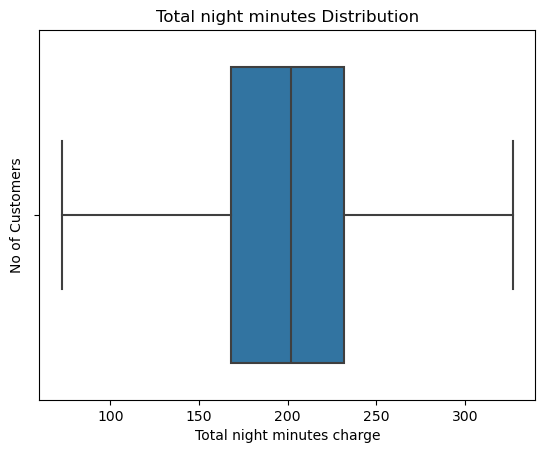

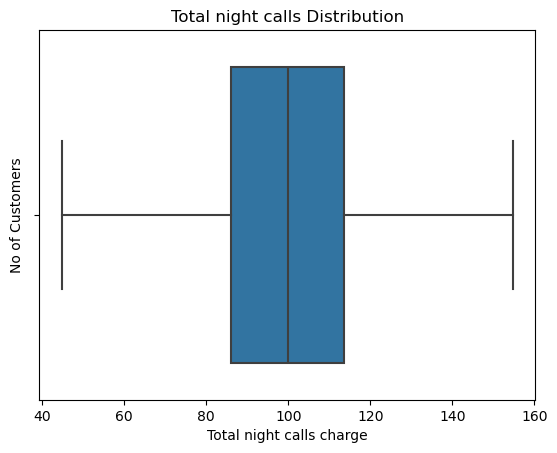

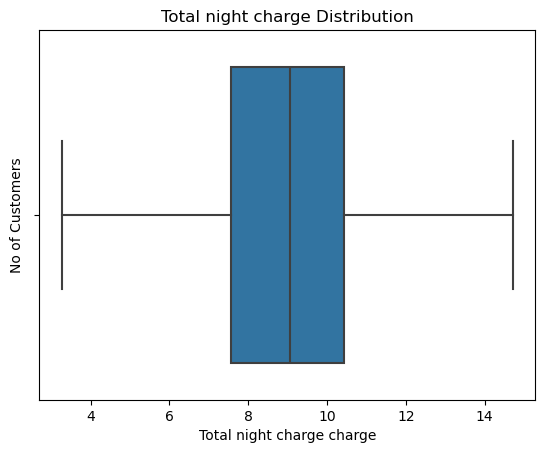

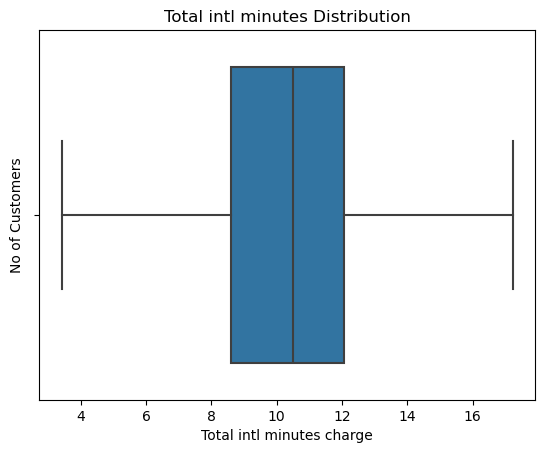

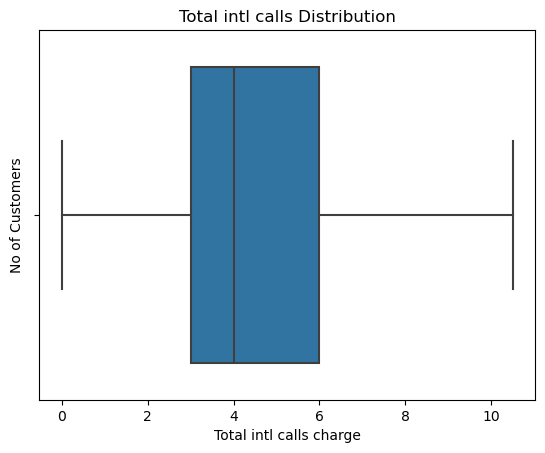

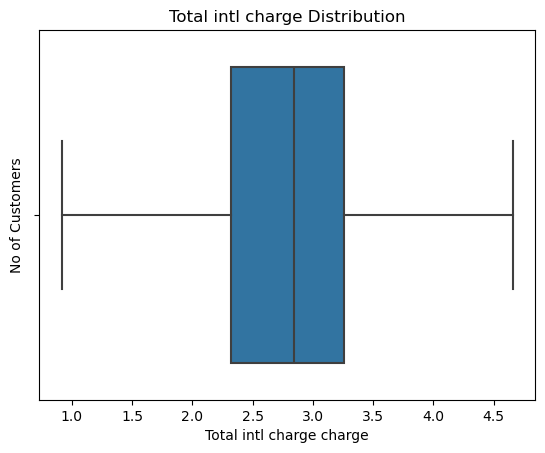

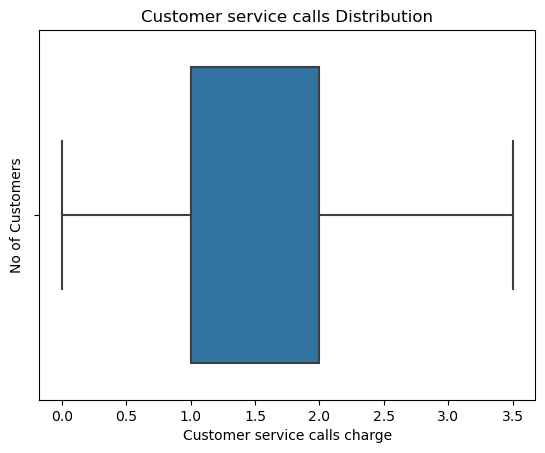

In [85]:
for i in num:
    ax = sns.boxplot(data = Tel_num,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [93]:
for col in num:
    Q1 = Tel_data[col].quantile(0.25)
    Q2 = Tel_data[col].quantile(0.75)
    IQR = Q2 - Q1
    lr = Q1 - 1.5*IQR
    ur = Q2 + 1.5*IQR
    Tel_data[col] = np.where(Tel_data[col]>ur,ur,Tel_data[col])
    Tel_data[col] = np.where(Tel_data[col]<lr,lr,Tel_data[col])

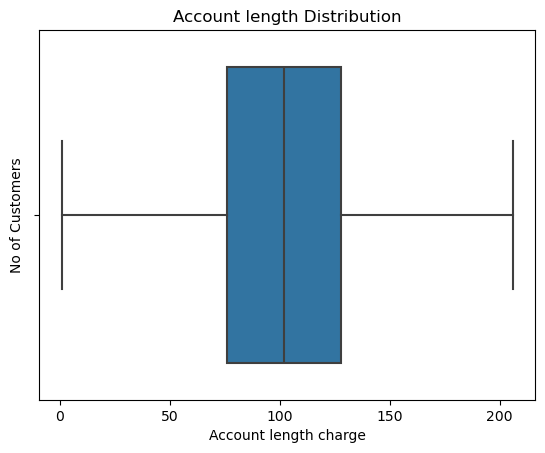

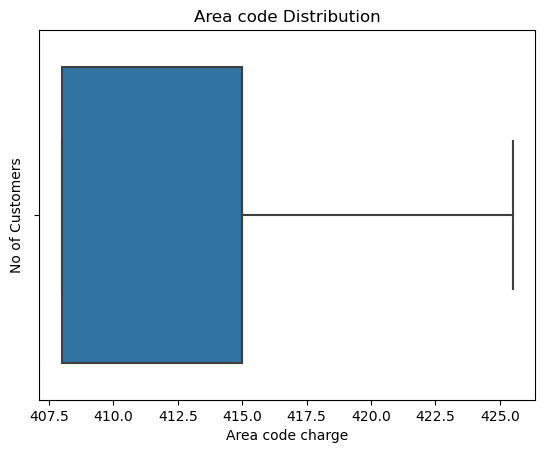

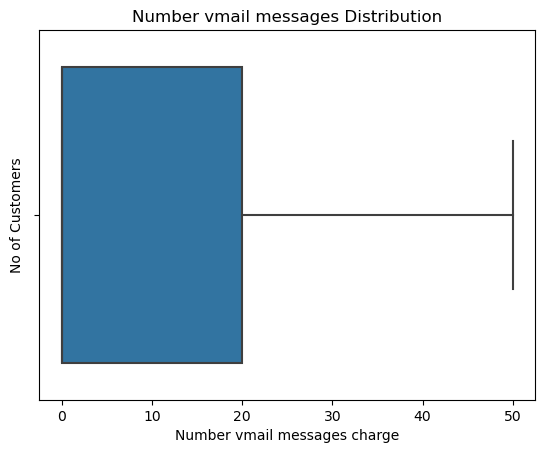

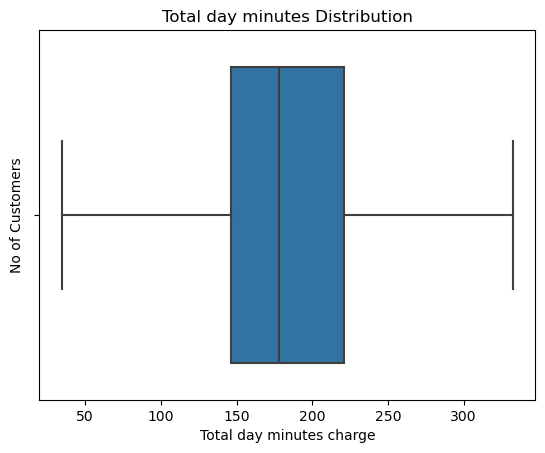

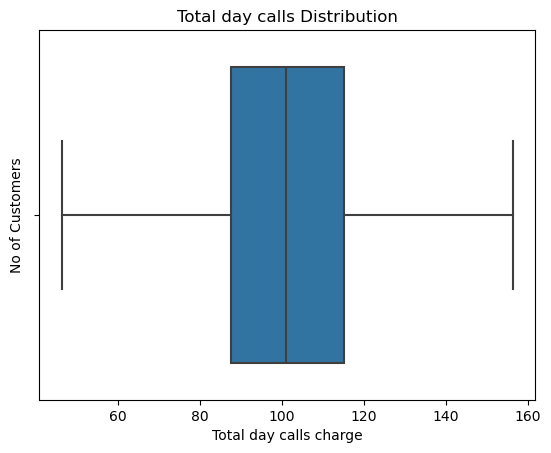

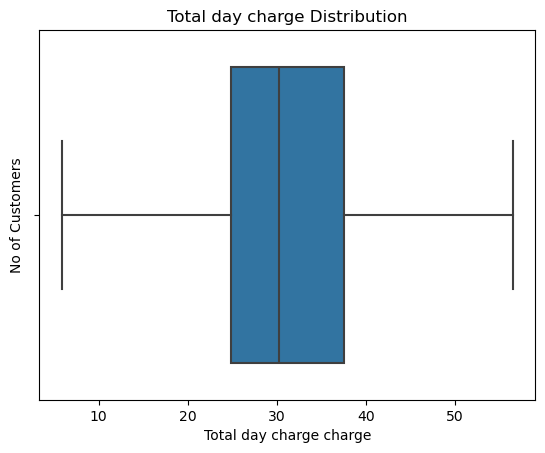

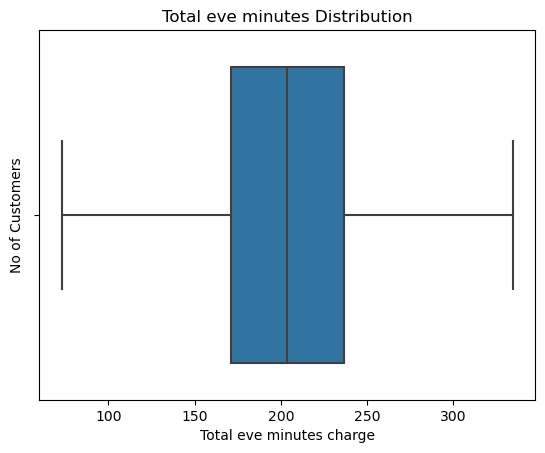

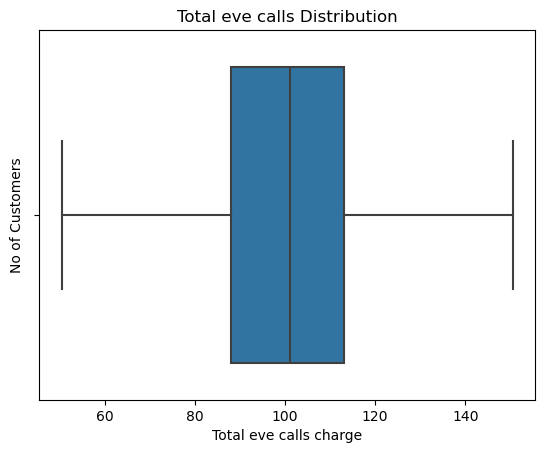

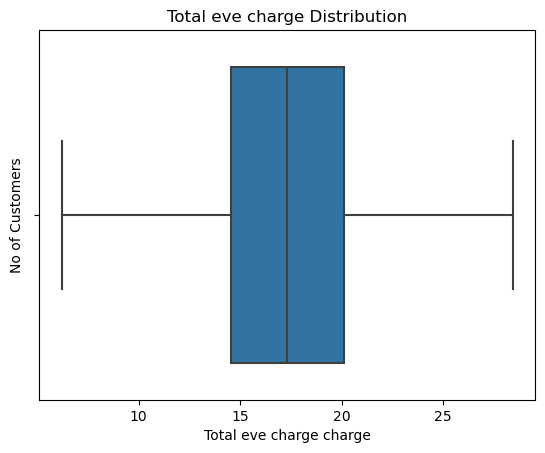

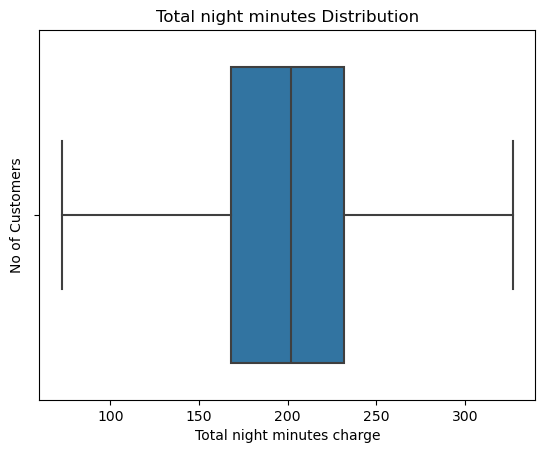

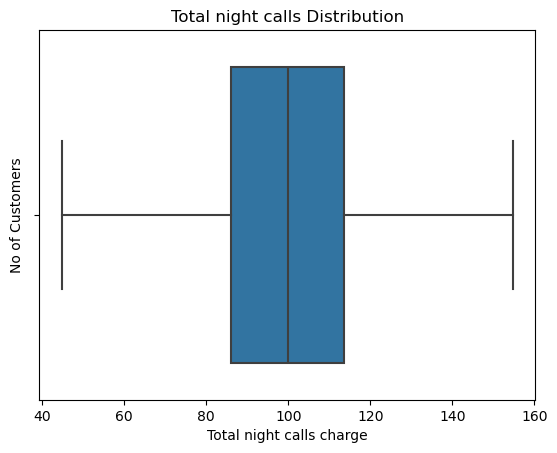

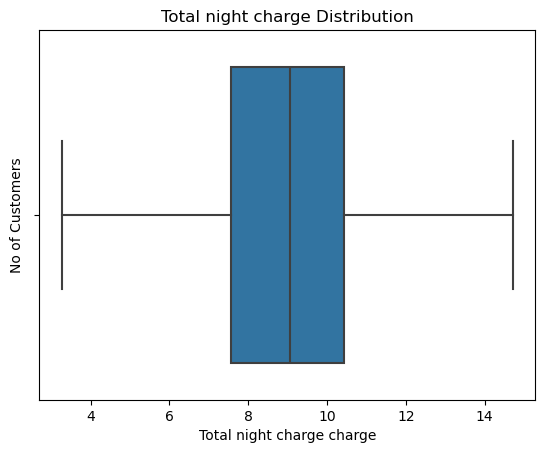

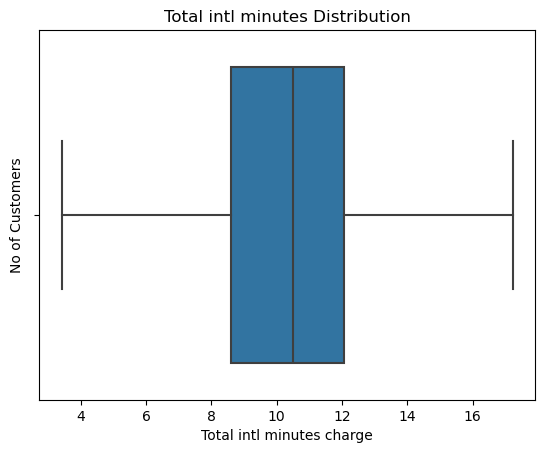

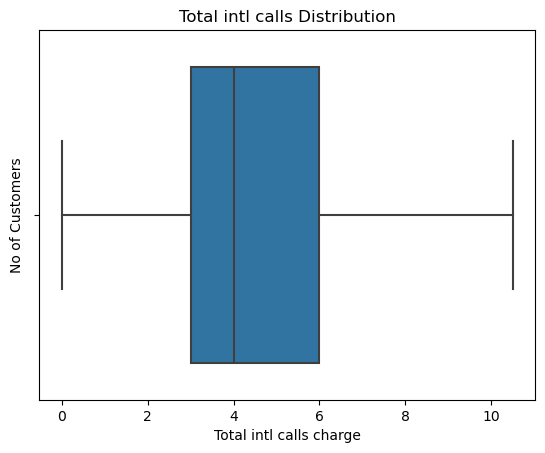

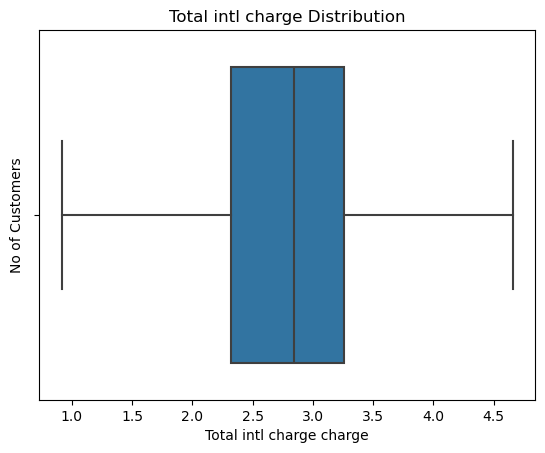

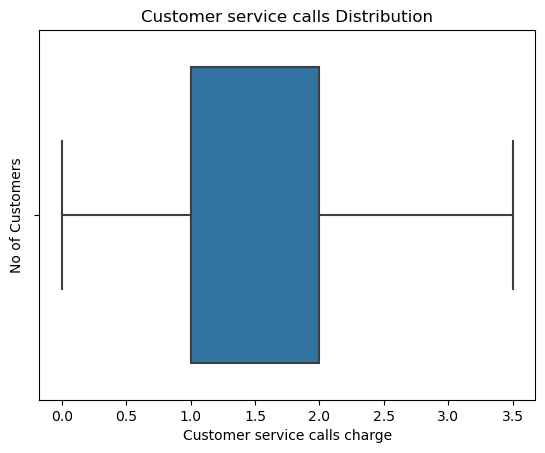

In [95]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [97]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [103]:
Tel_data.drop('State',axis=1,inplace = True)

In [107]:
Tel_data.replace(to_replace = ['No','Yes'],value = [0,1], inplace = True)

In [111]:
Tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    float64
 1   Area code               667 non-null    float64
 2   International plan      667 non-null    int64  
 3   Voice mail plan         667 non-null    int64  
 4   Number vmail messages   667 non-null    float64
 5   Total day minutes       667 non-null    float64
 6   Total day calls         667 non-null    float64
 7   Total day charge        667 non-null    float64
 8   Total eve minutes       667 non-null    float64
 9   Total eve calls         667 non-null    float64
 10  Total eve charge        667 non-null    float64
 11  Total night minutes     667 non-null    float64
 12  Total night calls       667 non-null    float64
 13  Total night charge      667 non-null    float64
 14  Total intl minutes      667 non-null    fl

In [113]:
wardlink = linkage(Tel_data,method = 'ward')

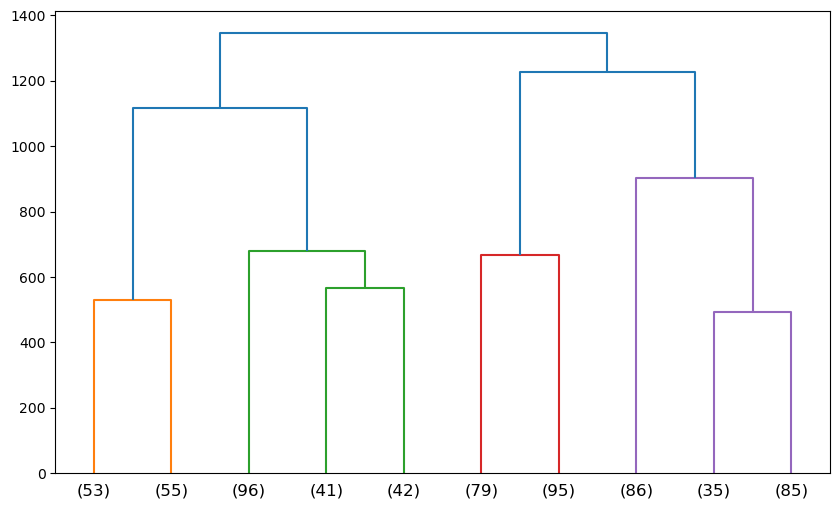

In [143]:
plt.figure(figsize=(10,6))
dendrogram(wardlink,truncate_mode = 'lastp',p=10);

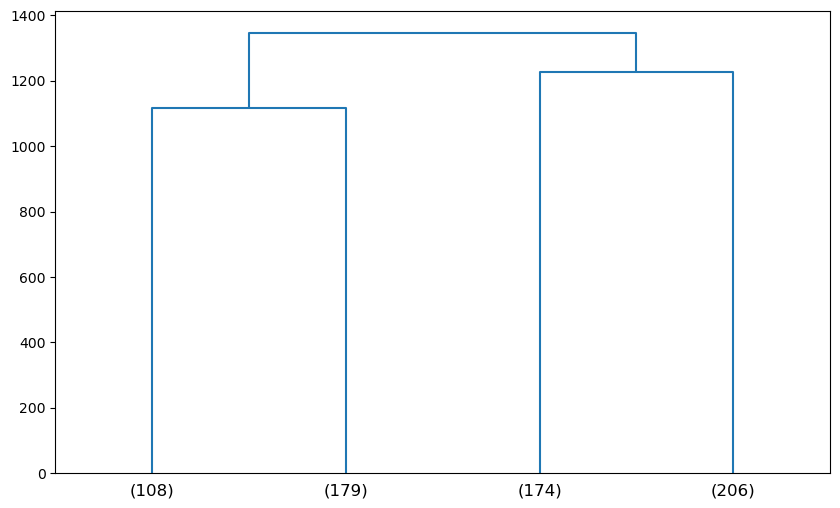

In [162]:
plt.figure(figsize=(10,6))
dendrogram(wardlink,truncate_mode = 'lastp',p=4);

In [145]:
from scipy.cluster.hierarchy import fcluster

In [147]:
Hie_Clus = fcluster(wardlink,4,criterion='maxclust')

In [149]:
Hie_Clus

array([2, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 3, 4, 3, 1, 2, 3, 1, 4, 3,
       1, 3, 4, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 4, 4, 4, 2, 1, 2, 4, 4, 3,
       2, 3, 2, 3, 3, 4, 3, 2, 4, 4, 2, 3, 1, 1, 4, 4, 1, 3, 1, 3, 1, 1,
       4, 3, 4, 2, 2, 2, 3, 3, 1, 2, 3, 1, 4, 4, 4, 4, 3, 3, 1, 2, 3, 1,
       3, 3, 4, 3, 2, 3, 2, 1, 2, 3, 4, 3, 3, 2, 2, 3, 4, 4, 4, 1, 2, 1,
       3, 4, 3, 3, 1, 2, 2, 3, 4, 2, 4, 2, 4, 2, 3, 2, 2, 4, 4, 3, 4, 4,
       3, 3, 1, 4, 2, 1, 2, 3, 4, 2, 3, 2, 3, 4, 1, 4, 3, 2, 4, 2, 3, 4,
       2, 3, 1, 1, 4, 2, 3, 1, 1, 3, 3, 4, 4, 4, 2, 2, 3, 2, 3, 4, 2, 1,
       2, 1, 3, 2, 1, 4, 4, 3, 1, 2, 4, 1, 2, 4, 3, 3, 4, 2, 4, 3, 4, 2,
       2, 4, 4, 3, 3, 1, 2, 4, 2, 2, 4, 1, 3, 4, 2, 1, 1, 3, 4, 2, 4, 4,
       4, 2, 2, 3, 3, 4, 1, 2, 2, 4, 3, 2, 2, 4, 4, 3, 2, 3, 3, 3, 4, 3,
       1, 4, 3, 4, 4, 2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2,
       4, 3, 2, 2, 4, 1, 3, 2, 4, 2, 4, 2, 2, 4, 3, 1, 2, 4, 4, 2, 4, 4,
       1, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 3, 4,

In [151]:
Tel_data['Hie_Clus'] = Hie_Clus

In [153]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Hie_Clus
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0,2
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5,3
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5,1
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0,4
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0,3
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0,3
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0,4
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0,4


In [157]:
round(Tel_data.pivot_table(values = num,index=['Hie_Clus'],aggfunc='mean'),1)

,Account length,Area code,Customer service calls,Number vmail messages,Total day calls,Total day charge,Total day minutes,Total eve calls,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes
Hie_Clus,,,,,,,,,,,,,,,,
1,93.6,415.6,1.4,10.0,101.8,42.2,248.1,101.6,20.3,238.7,4.6,2.7,10.0,102.0,9.8,217.6
2,94.9,416.3,1.5,7.7,101.4,29.9,176.0,102.0,19.3,227.4,4.6,2.8,10.5,97.8,7.0,156.3
3,95.8,415.4,1.5,10.1,101.3,21.7,127.9,97.9,17.7,207.8,4.2,2.7,10.2,97.1,10.2,226.0
4,120.2,415.6,1.5,6.7,99.9,33.1,194.9,100.6,13.6,160.2,4.5,2.8,10.3,103.6,9.3,205.7


KMeans Clustering

In [164]:
from sklearn.preprocessing import StandardScaler

In [166]:
Tel_data.drop('Hie_Clus',axis=1,inplace=True)

In [168]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0


In [170]:
X = StandardScaler()

In [172]:
Tel_data_Sc = X.fit_transform(Tel_data)

In [174]:
Tel_data_Sc

array([[ 0.35102222, -1.25161578, -0.29380132, ..., -0.20685762,
        -0.56975561, -0.42238727],
       [-0.9308113 , -0.12270743, -0.29380132, ...,  0.65818333,
         0.8944156 ,  1.82428184],
       [ 1.43565059, -0.12270743, -0.29380132, ...,  1.95574474,
        -1.77634114,  1.82428184],
       ...,
       [-1.05406452, -0.12270743, -0.29380132, ...,  1.52322427,
         1.07065843,  1.37494802],
       [ 1.3863493 , -0.12270743, -0.29380132, ..., -0.20685762,
         0.48770137, -0.42238727],
       [ 2.00261542,  1.57065509,  3.40366063, ...,  2.38826522,
        -1.92546969,  0.47628038]])

In [176]:
from sklearn.cluster import KMeans,DBSCAN

In [180]:
K_means = KMeans(n_clusters=2)
K_means.fit(Tel_data_Sc)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [184]:
print(K_means.labels_)
print()
print(K_means.inertia_)

[0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 1 0 0 

In [186]:
K_means = KMeans(n_clusters=3)
K_means.fit(Tel_data_Sc)
print(K_means.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


10034.3529038064


In [188]:
K_means = KMeans(n_clusters=4)
K_means.fit(Tel_data_Sc)
print(K_means.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


9507.300346627238


In [190]:
Inertia = []
for i in range(1,11):
    K_means = KMeans(n_clusters=i)
    K_means.fit(Tel_data_Sc)
    Inertia.append(K_means.inertia_)    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [194]:
Inertia

[12006.0,
 10715.668074166682,
 10035.486904723894,
 9511.676815874962,
 9108.12578889889,
 8717.101735500966,
 8454.35306058986,
 8263.841750108846,
 8031.043015605197,
 7905.047849238825]

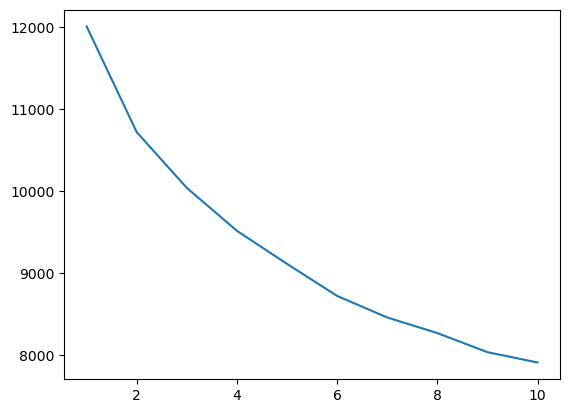

In [196]:
plt.plot(range(1,11),Inertia);

In [210]:
Inertia = []
for i in range(1,20):
    K_means = KMeans(n_clusters=i)
    K_means.fit(Tel_data_Sc)
    Inertia.append(K_means.inertia_)    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [211]:
Inertia

[12006.0,
 10715.668074166682,
 10035.775008764356,
 9546.561903939128,
 9101.842155331324,
 8765.828068011404,
 8462.693389299138,
 8251.714239685667,
 8055.943113589041,
 7890.702789301867,
 7731.901617390946,
 7603.483717397941,
 7449.234265296702,
 7376.992968443958,
 7257.9076267244345,
 7086.735861236855,
 7081.678612865587,
 6981.681530526049,
 6872.226262060442]

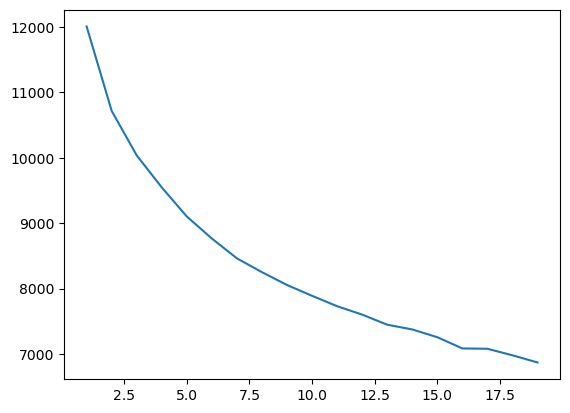

In [212]:
plt.plot(range(1,20),Inertia);

In [216]:
K_means = KMeans(n_clusters=2)
K_means.fit(Tel_data_Sc)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [224]:
Tel_data['Kmeans_Clus'] = K_means.labels_

In [226]:
Tel_data['Hie_Clus'] = Hie_Clus

In [228]:
Tel_data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Kmeans_Clus,Hie_Clus
0,117.0,408.0,0,0,0.0,184.500,97.0,31.37,334.55,80.0,28.4275,215.8,90.0,9.71,8.7,4.0,2.35,1.0,0,2
1,65.0,415.0,0,0,0.0,129.100,137.0,21.95,228.50,83.0,19.4200,208.8,111.0,9.40,12.7,6.0,3.43,3.5,0,3
2,161.0,415.0,0,0,0.0,332.375,67.0,56.51,317.80,97.0,27.0100,160.6,128.0,7.23,5.4,9.0,1.46,3.5,0,1
3,111.0,415.0,0,0,0.0,110.400,103.0,18.77,137.30,102.0,11.6700,189.6,105.0,8.53,7.7,6.0,2.08,2.0,0,4
4,49.0,425.5,0,0,0.0,119.300,117.0,20.28,215.10,109.0,18.2800,178.7,90.0,8.04,11.1,1.0,3.00,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114.0,415.0,0,1,26.0,137.100,88.0,23.31,155.70,125.0,13.2300,247.6,94.0,11.14,11.5,7.0,3.11,2.0,1,3
663,106.0,408.0,0,1,29.0,83.600,131.0,14.21,203.90,131.0,17.3300,229.5,73.0,10.33,8.1,3.0,2.19,1.0,1,3
664,60.0,415.0,0,0,0.0,193.900,118.0,32.96,85.00,110.0,7.2300,210.1,134.0,9.45,13.2,8.0,3.56,3.0,0,4
665,159.0,415.0,0,0,0.0,169.800,114.0,28.87,197.70,105.0,16.8000,193.7,82.0,8.72,11.6,4.0,3.13,1.0,0,4
